In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
mini_batch_size, num_epochs = 100, 50
input_size = 252
number_units = 256
number_layers =3
output_size = 88
size_samples = 100

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# path to numpy files for data
X_train = np.load("/content/drive/MyDrive/Data/totalCQT3.npy")
y_train = np.load("/content/drive/MyDrive/Data/totallabel3.npy")

X_val = np.load("/content/drive/MyDrive/Data/totalCQT4.npy")
y_val = np.load("/content/drive/MyDrive/Data/totallabel4.npy")

In [5]:
print(X_train.shape,y_train.shape,X_val.shape,y_val.shape)

(15850, 100, 252) (15850, 100, 88) (5034, 100, 252) (5034, 100, 88)


In [6]:
# build model
def build_model():
    # create a model
    # generate a rnn lstm model
    
    model = keras.Sequential()
    
    # 1st LSTM layer
    model.add(keras.layers.LSTM(256,
                                input_shape=(None,input_size),
                                return_sequences = True,
                                kernel_initializer = 'normal',
                                activation = 'tanh'))
    model.add(keras.layers.Dropout(0.2))
    
    # 2nd LSTM layer
    model.add(keras.layers.LSTM(256,
                                input_shape=(None,input_size),
                                return_sequences = True,
                                kernel_initializer = 'normal',
                                activation = 'tanh'))
    model.add(keras.layers.Dropout(0.2))
    
    # 3rd LSTM layer
    model.add(keras.layers.LSTM(256,
                                input_shape=(None,input_size),
                                return_sequences = True,
                                kernel_initializer = 'normal',
                                activation = 'tanh'))
    model.add(keras.layers.Dropout(0.2))
    
    #output using dense layer
    
    model.add(keras.layers.Dense(output_size,
                                 kernel_initializer = "normal",
                                 activation = "sigmoid"))
    
    return model

In [7]:
model = build_model()

In [8]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create the accuracy subplot
    axs[0].plot(history.history["accuracy"], label = "train accuracy")
    axs[0].plot(history.history["val_accuracy"], label = "test accuracy")
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel("Epoch")
    axs[0].legend(loc ="lower right")
    axs[0].set_title("Accuracy eval")

    # create the error subplot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel('Error')
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [9]:
# compile the network
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss = "binary_crossentropy")

In [11]:
# train the rnn
import timeit
start = timeit.default_timer()
history = model.fit(X_train,y_train,
          validation_data=(X_val,y_val),
          validation_batch_size=mini_batch_size,
          verbose = True,
          epochs = num_epochs
          )
end = timeit.default_timer()
print("Time Taken - " + str(end-start))

Epoch 1/50
496/496 [==============================] - 14s 27ms/step - loss: 0.1742 - val_loss: 0.1754
Epoch 2/50
496/496 [==============================] - 13s 27ms/step - loss: 0.1733 - val_loss: 0.1677
Epoch 3/50
496/496 [==============================] - 13s 27ms/step - loss: 0.1668 - val_loss: 0.1644
Epoch 4/50
496/496 [==============================] - 13s 26ms/step - loss: 0.1658 - val_loss: 0.1625
Epoch 5/50
496/496 [==============================] - 13s 26ms/step - loss: 0.1653 - val_loss: 0.1624
Epoch 6/50
496/496 [==============================] - 13s 27ms/step - loss: 0.1638 - val_loss: 0.1536
Epoch 7/50
496/496 [==============================] - 13s 27ms/step - loss: 0.1353 - val_loss: 0.1200
Epoch 8/50
496/496 [==============================] - 13s 27ms/step - loss: 0.1132 - val_loss: 0.1100
Epoch 9/50
496/496 [==============================] - 13s 27ms/step - loss: 0.1015 - val_loss: 0.1048
Epoch 10/50
496/496 [==============================] - 13s 27ms/step - loss: 0.093

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 256)         521216    
_________________________________________________________________
dropout (Dropout)            (None, None, 256)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 256)         525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 256)         525312    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
dense (Dense)                (None, None, 88)          2

#Calculating Accuracy, Precision, Recall and F-Score

In [14]:
pred = model.predict(X_val)

In [15]:
pred = pred>=0.5
pred = pred - 0.0

In [16]:
y_val = y_val-0.0

In [17]:
true_positives = 0
false_positives = 0
false_negatives = 0
for i in range(pred.shape[0]):
  for j in range(pred.shape[1]):
    for k in range(pred.shape[2]):
      if y_val[i][j][k] == 1.0 and pred[i][j][k] == 1.0:
        true_positives+=1                                
      elif y_val[i][j][k] == 1.0 and pred[i][j][k] == 0.0:
        false_negatives+=1
      elif y_val[i][j][k] == 0.0 and pred[i][j][k] == 1.0:
        false_positives+=1
accuracy = (true_positives/(true_positives+false_positives+false_negatives))
precision = true_positives/(true_positives+false_positives)
recall = true_positives/(true_positives+false_negatives)
fscore = (2*precision*recall)/(precision+recall)

In [18]:
print(accuracy, precision, recall, fscore)

0.41184509002085173 0.7336514956665562 0.4842492079156495 0.5834139919908199


In [19]:
model.save("cqt_trained.h5")

#Plotting an Example Piano-roll

In [20]:
x = np.load("/content/MAPS_MUS-alb_se2_ENSTDkCl_CQT.npy")
x = x.reshape(1,-1,252)
y = np.load("/content/MAPS_MUS-alb_se2_ENSTDkCl_label.npy")
y = y.reshape(1,-1,88)
y = y-0.0
print(x.shape,y.shape)

(1, 20426, 252) (1, 20426, 88)


In [21]:
predict = model.predict(x)
predict = predict>=0.5
predict = predict-0.0

PREDICTED


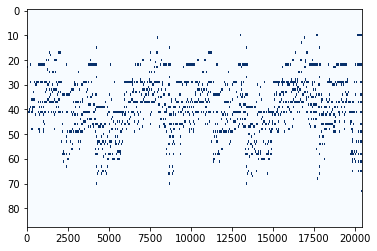

ORIGINAL


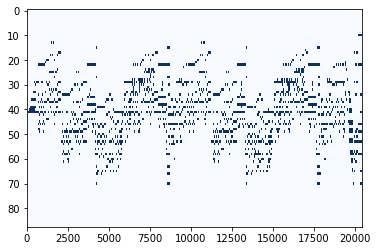

In [23]:
print("PREDICTED")
plt.figure()
plt.plot()
plt.imshow(np.squeeze(predict).T, cmap="Blues", aspect="auto", interpolation="nearest")
plt.show()
print("ORIGINAL")
plt.figure()
plt.plot()
plt.imshow(np.squeeze(y).T, cmap="Blues", aspect="auto", interpolation="nearest")
plt.show()